In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm                               # used for in LJung-Box Test

In [71]:
reviews = pd.read_csv('reviews_final.csv')
print(reviews.shape)
reviews

(146864, 14)


,Unnamed: 0,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
0,0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,Tools,hate shirt collar otherwise secured place butt...,0,1,-0.200000,Negative
1,1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,Tools,little magnet really powerful size using make ...,0,0,-0.095833,Negative
2,2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,Tools,wanted something small mount back filagree woo...,0,0,0.083333,Positive
3,3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,Tools,use magnetize warhammer k miniature together a...,0,0,0.287500,Positive
4,4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,Tools,soo freaking annoying spend time dan near brea...,23,25,-0.077778,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146859,13267,AT53ZTTO707MB,B00KS0F4FI,"[1, 2]",Simple. Perfect. Plenty big enough. Durable...,5,Great pair of claws,2014-06-27,Garden,simple perfect plenty big enough durable tough...,1,2,0.286111,Positive
146860,13268,AYB4ELCS5AM8P,B00KS0F4FI,"[0, 0]",These claws are fantastic. They are made of ha...,5,Sharp...,2014-07-12,Garden,claw fantastic made hard sturdy plastic whethe...,0,0,0.206481,Positive
146861,13269,AZMY6E8B52L2T,B00KS0F4FI,"[1, 3]",I really like theseOuddy Heat Resistant Meat C...,5,Really Helpful...,2014-07-12,Garden,really like theseouddy heat resistant meat cla...,1,3,0.275926,Positive
146862,13270,AEC90GPFKLAAW,B00KS0F4FI,"[0, 0]",I make pulled pork in the crock pot pretty oft...,5,Shreds meat perfectly!,2014-07-16,Garden,make pulled pork crock pot pretty often always...,0,0,0.036369,Positive


In [3]:
reviews = reviews[['ReviewDate','Sentiment']]

In [4]:
reviews.head()

,ReviewDate,Sentiment
0,2014-01-29,Negative
1,2013-05-31,Negative
2,2013-03-13,Positive
3,2013-06-16,Positive
4,2013-08-09,Negative


In [5]:
# Converting date into date-time format

reviews['ReviewDate'] = pd.to_datetime(reviews['ReviewDate'])

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146864 entries, 0 to 146863
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ReviewDate  146864 non-null  datetime64[ns]
 1   Sentiment   146864 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ MB


In [7]:
# Converting Sentiment column into Label Encoder

sentiment_encoder = preprocessing.LabelEncoder()
sentiment_encoder.fit(reviews.Sentiment)
print('Showing the Sentiment values : ',sentiment_encoder.classes_)

reviews['Sentiment'] = sentiment_encoder.transform(reviews['Sentiment'])
print('\nAfter converting Sentiment to numeric column : \n',reviews['Sentiment'])

Showing the Sentiment values :  ['Negative' 'Neutral' 'Positive']

After converting Sentiment to numeric column : 
 0         0
1         0
2         2
3         2
4         0
         ..
146859    2
146860    2
146861    2
146862    2
146863    2
Name: Sentiment, Length: 146864, dtype: int32


In [8]:
reviews = reviews.set_index(['ReviewDate'])
reviews.head()

,Sentiment
ReviewDate,
2014-01-29,0
2013-05-31,0
2013-03-13,2
2013-06-16,2
2013-08-09,0


In [9]:
reviews_1 = reviews['Sentiment'].unique()
reviews_1

array([0, 2, 1])

In [10]:
reviews = reviews.squeeze()
type(reviews)

pandas.core.series.Series

In [11]:
# Resampling into Months 

reviews = reviews.resample('M').sum()

In [12]:
reviews

ReviewDate
1999-11-30      14
1999-12-31      36
2000-01-31      14
2000-02-29       4
2000-03-31      22
              ... 
2014-03-31    9315
2014-04-30    8861
2014-05-31    9079
2014-06-30    9073
2014-07-31    5171
Freq: M, Name: Sentiment, Length: 177, dtype: int32

In [13]:
# Splitting the data into train and test

ss = int(0.7 * len(reviews))

train = reviews.iloc[:ss]
test = reviews.iloc[ss:]

print('Train : ',len(train), '\t Test : ',len(test))

Train :  123 	 Test :  54


In [14]:
train.head()

ReviewDate
1999-11-30    14
1999-12-31    36
2000-01-31    14
2000-02-29     4
2000-03-31    22
Freq: M, Name: Sentiment, dtype: int32

In [15]:
test.head()

ReviewDate
2010-02-28     958
2010-03-31    1037
2010-04-30    1102
2010-05-31     884
2010-06-30     797
Freq: M, Name: Sentiment, dtype: int32

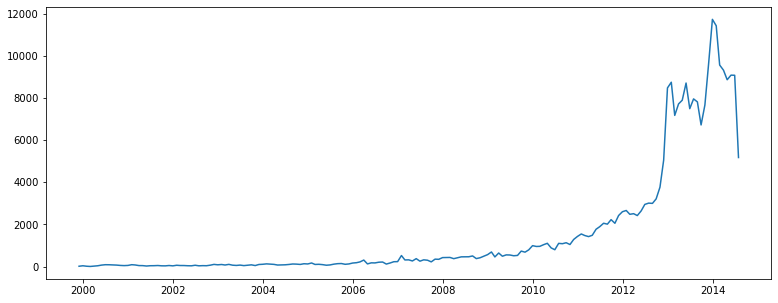

In [16]:
plt.figure(figsize=(13,5))
plt.plot(reviews)
plt.show()

C:\Users\Nitesh\AppData\Local\Temp\ipykernel_16280\2143895508.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead.
  decomposition = seasonal_decompose(np.asarray(train), freq=5)


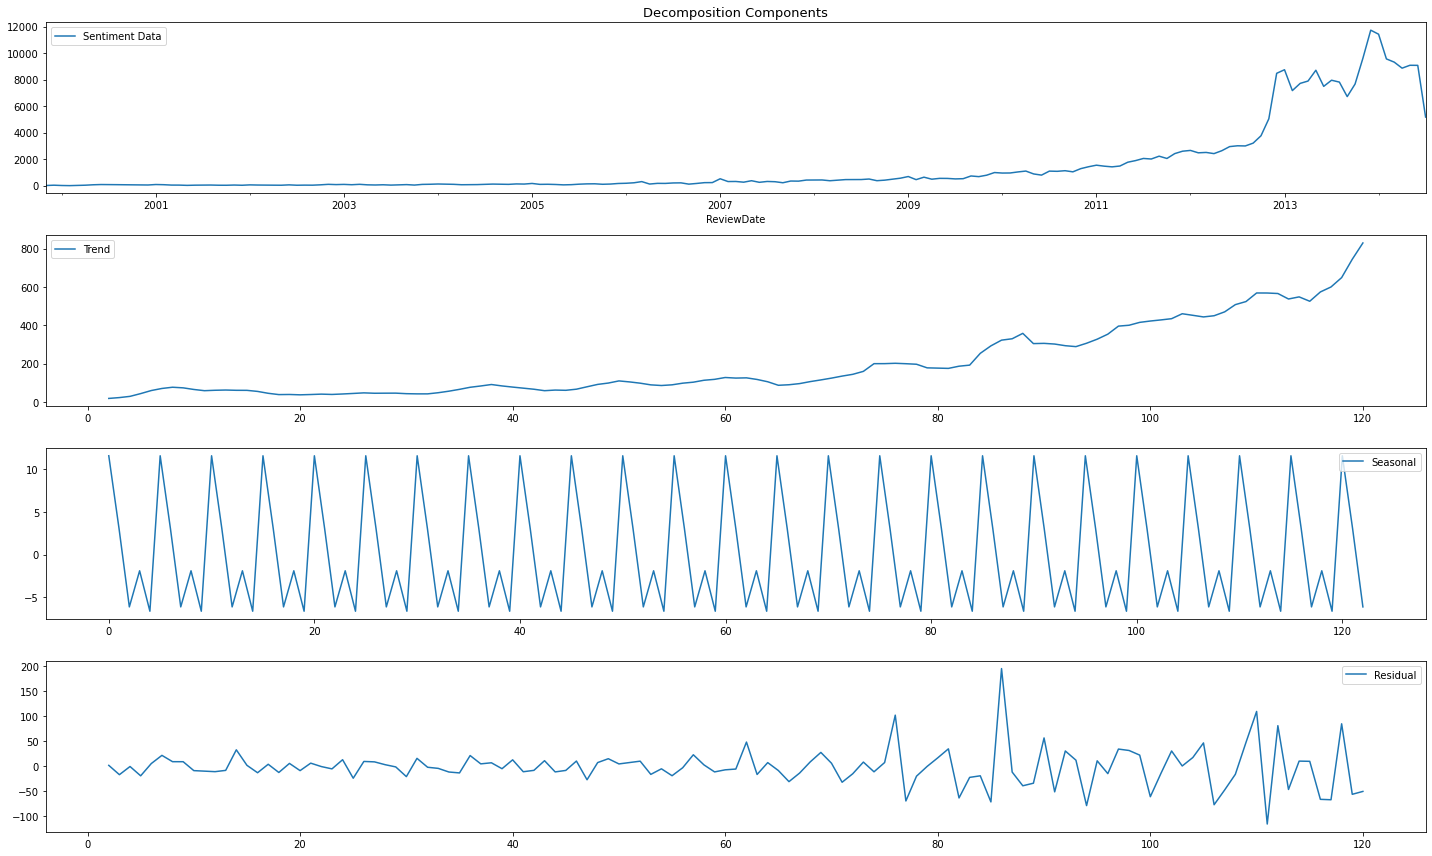

In [63]:
# visual inspection of data

decomposition = seasonal_decompose(np.asarray(train), freq=5)

d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)

plt.title('Decomposition Components', fontsize=13)
# plt.plot(df1,label='Sales Data')
reviews.plot(label='Sentiment Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

plt.show()

In [18]:
# checking stationarity

def stationaritycheck(data):
    pvalue = adfuller(data)[1]
    if (pvalue < 0.05):
        print('P-value =',pvalue,'. Data is stationary now proceed for model building')
    else:
        print('P-value =',pvalue,'. Data is not stationary now make data stationarity then proceed for model building')

In [19]:
print(stationaritycheck(train))

P-value = 1.0 . Data is not stationary now make data stationarity then proceed for model building
None


In [20]:
# Make the data stationary for train

diff_train = train - train.shift()
diff_train

ReviewDate
1999-11-30      NaN
1999-12-31     22.0
2000-01-31    -22.0
2000-02-29    -10.0
2000-03-31     18.0
              ...  
2009-09-30    205.0
2009-10-31    -50.0
2009-11-30    109.0
2009-12-31    199.0
2010-01-31    -38.0
Freq: M, Name: Sentiment, Length: 123, dtype: float64

In [21]:
# removing null values

print('Before removing numm values : ',len(diff_train))
diff_train.dropna(inplace=True)
print('After removing null value : ',len(diff_train))
diff_train

Before removing numm values :  123
After removing null value :  122


ReviewDate
1999-12-31     22.0
2000-01-31    -22.0
2000-02-29    -10.0
2000-03-31     18.0
2000-04-30     14.0
              ...  
2009-09-30    205.0
2009-10-31    -50.0
2009-11-30    109.0
2009-12-31    199.0
2010-01-31    -38.0
Freq: M, Name: Sentiment, Length: 122, dtype: float64

In [22]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_train))

P-value = 5.3100559160136414e-30 . Data is stationary now proceed for model building
None


In [23]:
# Make the data stationary for test

diff_test = test - test.shift()
diff_test

ReviewDate
2010-02-28       NaN
2010-03-31      79.0
2010-04-30      65.0
2010-05-31    -218.0
2010-06-30     -87.0
2010-07-31     301.0
2010-08-31     -15.0
2010-09-30      46.0
2010-10-31     -85.0
2010-11-30     240.0
2010-12-31     144.0
2011-01-31     117.0
2011-02-28     -74.0
2011-03-31     -51.0
2011-04-30      62.0
2011-05-31     287.0
2011-06-30     123.0
2011-07-31     161.0
2011-08-31     -42.0
2011-09-30     213.0
2011-10-31    -172.0
2011-11-30     368.0
2011-12-31     180.0
2012-01-31      59.0
2012-02-29    -181.0
2012-03-31      29.0
2012-04-30     -89.0
2012-05-31     219.0
2012-06-30     310.0
2012-07-31      61.0
2012-08-31     -12.0
2012-09-30     213.0
2012-10-31     555.0
2012-11-30    1281.0
2012-12-31    3428.0
2013-01-31     270.0
2013-02-28   -1573.0
2013-03-31     544.0
2013-04-30     176.0
2013-05-31     815.0
2013-06-30   -1216.0
2013-07-31     463.0
2013-08-31    -141.0
2013-09-30   -1094.0
2013-10-31     946.0
2013-11-30    1944.0
2013-12-31    2119.0
20

In [24]:
# removing null values

print('Before removing numm values : ',len(diff_test))
diff_test.dropna(inplace=True)
print('After removing null value : ',len(diff_test))
diff_test

Before removing numm values :  54
After removing null value :  53


ReviewDate
2010-03-31      79.0
2010-04-30      65.0
2010-05-31    -218.0
2010-06-30     -87.0
2010-07-31     301.0
2010-08-31     -15.0
2010-09-30      46.0
2010-10-31     -85.0
2010-11-30     240.0
2010-12-31     144.0
2011-01-31     117.0
2011-02-28     -74.0
2011-03-31     -51.0
2011-04-30      62.0
2011-05-31     287.0
2011-06-30     123.0
2011-07-31     161.0
2011-08-31     -42.0
2011-09-30     213.0
2011-10-31    -172.0
2011-11-30     368.0
2011-12-31     180.0
2012-01-31      59.0
2012-02-29    -181.0
2012-03-31      29.0
2012-04-30     -89.0
2012-05-31     219.0
2012-06-30     310.0
2012-07-31      61.0
2012-08-31     -12.0
2012-09-30     213.0
2012-10-31     555.0
2012-11-30    1281.0
2012-12-31    3428.0
2013-01-31     270.0
2013-02-28   -1573.0
2013-03-31     544.0
2013-04-30     176.0
2013-05-31     815.0
2013-06-30   -1216.0
2013-07-31     463.0
2013-08-31    -141.0
2013-09-30   -1094.0
2013-10-31     946.0
2013-11-30    1944.0
2013-12-31    2119.0
2014-01-31    -304.0
20

In [25]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_test))

P-value = 0.06356516831773158 . Data is not stationary now make data stationarity then proceed for model building
None


In [26]:
# Make the data stationary for test

diff_test = diff_test - diff_test.shift()
diff_test

ReviewDate
2010-03-31       NaN
2010-04-30     -14.0
2010-05-31    -283.0
2010-06-30     131.0
2010-07-31     388.0
2010-08-31    -316.0
2010-09-30      61.0
2010-10-31    -131.0
2010-11-30     325.0
2010-12-31     -96.0
2011-01-31     -27.0
2011-02-28    -191.0
2011-03-31      23.0
2011-04-30     113.0
2011-05-31     225.0
2011-06-30    -164.0
2011-07-31      38.0
2011-08-31    -203.0
2011-09-30     255.0
2011-10-31    -385.0
2011-11-30     540.0
2011-12-31    -188.0
2012-01-31    -121.0
2012-02-29    -240.0
2012-03-31     210.0
2012-04-30    -118.0
2012-05-31     308.0
2012-06-30      91.0
2012-07-31    -249.0
2012-08-31     -73.0
2012-09-30     225.0
2012-10-31     342.0
2012-11-30     726.0
2012-12-31    2147.0
2013-01-31   -3158.0
2013-02-28   -1843.0
2013-03-31    2117.0
2013-04-30    -368.0
2013-05-31     639.0
2013-06-30   -2031.0
2013-07-31    1679.0
2013-08-31    -604.0
2013-09-30    -953.0
2013-10-31    2040.0
2013-11-30     998.0
2013-12-31     175.0
2014-01-31   -2423.0
20

In [27]:
# removing null values

print('Before removing numm values : ',len(diff_test))
diff_test.dropna(inplace=True)
print('After removing null value : ',len(diff_test))
diff_test

Before removing numm values :  53
After removing null value :  52


ReviewDate
2010-04-30     -14.0
2010-05-31    -283.0
2010-06-30     131.0
2010-07-31     388.0
2010-08-31    -316.0
2010-09-30      61.0
2010-10-31    -131.0
2010-11-30     325.0
2010-12-31     -96.0
2011-01-31     -27.0
2011-02-28    -191.0
2011-03-31      23.0
2011-04-30     113.0
2011-05-31     225.0
2011-06-30    -164.0
2011-07-31      38.0
2011-08-31    -203.0
2011-09-30     255.0
2011-10-31    -385.0
2011-11-30     540.0
2011-12-31    -188.0
2012-01-31    -121.0
2012-02-29    -240.0
2012-03-31     210.0
2012-04-30    -118.0
2012-05-31     308.0
2012-06-30      91.0
2012-07-31    -249.0
2012-08-31     -73.0
2012-09-30     225.0
2012-10-31     342.0
2012-11-30     726.0
2012-12-31    2147.0
2013-01-31   -3158.0
2013-02-28   -1843.0
2013-03-31    2117.0
2013-04-30    -368.0
2013-05-31     639.0
2013-06-30   -2031.0
2013-07-31    1679.0
2013-08-31    -604.0
2013-09-30    -953.0
2013-10-31    2040.0
2013-11-30     998.0
2013-12-31     175.0
2014-01-31   -2423.0
2014-02-28   -1559.0
20

In [28]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_test))

P-value = 0.004951468323191354 . Data is stationary now proceed for model building
None


C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


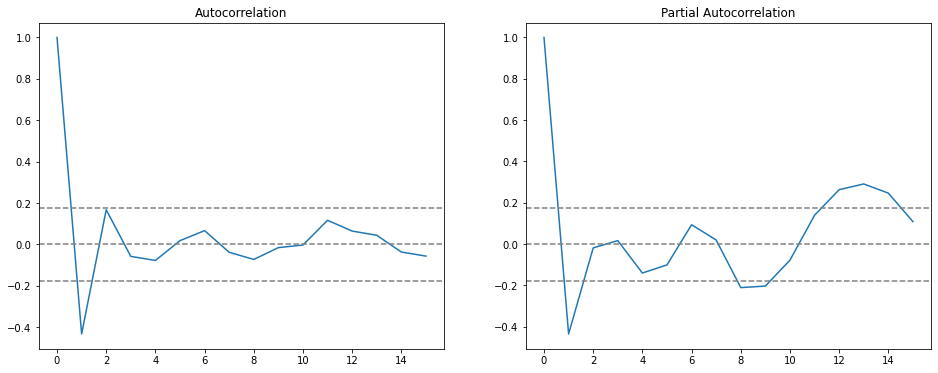

In [29]:
# Plotting ACF and PACF

lag_pcf = acf(diff_train, nlags=15)
lag_pacf = pacf(diff_train, nlags=15, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

In [30]:
model2_1 = ARIMA(diff_train, order=(1,0,2))
results2_1 = model2_1.fit()
model2_2 = ARIMA(diff_train, order=(2,0,2))
results2_2 = model2_2.fit()
model2_3 = ARIMA(diff_train, order=(3,0,1))
results2_3 = model2_3.fit()
model2_4 = ARIMA(diff_train, order=(4,0,2))
results2_4 = model2_4.fit()
model2_5 = ARIMA(diff_train, order=(5,0,2))
results2_5 = model2_5.fit()

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
print("ARIMA(1,0,2)): \t LL = ", results2_1.llf, "\t AIC = ", results2_1.aic)
print("ARIMA(2,0,2):  \t LL = ", results2_2.llf, "\t AIC = ", results2_2.aic)
print("ARIMA(3,0,1):  \t LL = ", results2_3.llf, "\t AIC = ", results2_3.aic)
print("ARIMA(4,0,2):  \t LL = ", results2_4.llf, "\t AIC = ", results2_4.aic)
print("ARIMA(5,0,2):  \t LL = ", results2_5.llf, "\t AIC = ", results2_5.aic)

ARIMA(1,0,2)): 	 LL =  -673.758755919083 	 AIC =  1357.517511838166
ARIMA(2,0,2):  	 LL =  -673.4087493938869 	 AIC =  1358.8174987877737
ARIMA(3,0,1):  	 LL =  -673.340218343925 	 AIC =  1358.68043668785
ARIMA(4,0,2):  	 LL =  -670.58516890223 	 AIC =  1357.17033780446
ARIMA(5,0,2):  	 LL =  -670.1662327204918 	 AIC =  1358.3324654409837


In [32]:
print('Order - (5,0,2) is giving high liklihood and minimum AIC & BIC')

Order - (5,0,2) is giving high liklihood and minimum AIC & BIC


# Building ARMA model

In [33]:
p=5; q=2

m1 = ARIMA(diff_train, order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                  122
Model:                 ARIMA(5, 0, 2)   Log Likelihood                -670.166
Date:                Tue, 07 Jun 2022   AIC                           1358.332
Time:                        12:11:22   BIC                           1383.569
Sample:                    12-31-1999   HQIC                          1368.583
                         - 01-31-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7956      4.761      1.637      0.102      -1.536      17.127
ar.L1         -0.1651      0.093     -1.780      0.075      -0.347       0.017
ar.L2         -0.7872      0.094     -8.373      0.0

In [34]:
strt = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

print('Start : ',strt,'End : ',end)

prediction1 = m1.predict(strt, end)
prediction1

Start :  122 End :  173


2010-02-28    42.775970
2010-03-31    30.669406
2010-04-30   -26.806158
2010-05-31   -12.923354
2010-06-30    25.129110
2010-07-31    32.629811
2010-08-31     2.416186
2010-09-30   -15.542792
2010-10-31     3.847121
2010-11-30    26.172708
2010-12-31    17.940476
2011-01-31    -4.087950
2011-02-28    -5.226803
2011-03-31    13.096513
2011-04-30    20.832911
2011-05-31     8.101147
2011-06-30    -3.183399
2011-07-31     3.480453
2011-08-31    15.542579
2011-09-30    14.328378
2011-10-31     3.617610
2011-11-30     0.694469
2011-12-31     8.727337
2012-01-31    14.181351
2012-02-29     9.361615
2012-03-31     2.941183
2012-04-30     4.670273
2012-05-31    10.771347
2012-06-30    11.553776
2012-07-31     6.652070
2012-08-31     4.175879
2012-09-30     7.431567
2012-10-31    10.740807
2012-11-30     9.193226
2012-12-31     5.806152
2013-01-31     5.871751
2013-02-28     8.777654
2013-03-31     9.795179
2013-04-30     7.698714
2013-05-31     6.058661
2013-06-30     7.236528
2013-07-31     9

In [35]:
prediction1.values

array([ 42.77597032,  30.6694063 , -26.80615767, -12.92335369,
        25.12910975,  32.62981083,   2.4161861 , -15.5427921 ,
         3.84712071,  26.17270814,  17.94047612,  -4.08795033,
        -5.22680279,  13.09651268,  20.8329109 ,   8.10114726,
        -3.18339867,   3.48045269,  15.54257871,  14.32837829,
         3.61760988,   0.69446908,   8.72733656,  14.18135069,
         9.36161502,   2.94118332,   4.67027299,  10.77134729,
        11.55377626,   6.65206986,   4.17587928,   7.43156694,
        10.74080661,   9.19322611,   5.80615249,   5.87175075,
         8.77765431,   9.7951788 ,   7.69871381,   6.05866095,
         7.23652791,   9.06692251,   8.74089094,   7.06319316,
         6.72089594,   8.02182522,   8.79356254,   7.971802  ,
         7.01169058,   7.35620268,   8.30030196,   8.35591174])

In [36]:
# Performing the LJung-Box test

pvalue = sm.stats.acorr_ljungbox(m1.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [37]:
# Calculating actual, predicted, and error values together

actual=[]; pred=[]

# for i in range(len(prediction1)):
#     actual.append(test[i])
#     pred.append(prediction1[i])

reviews_1 = pd.DataFrame({'Actual':diff_test, 'Predicted':prediction1})
reviews_1['Error'] = reviews_1['Actual'] - reviews_1['Predicted']
reviews_1

,Actual,Predicted,Error
2010-02-28,NaN,42.775970,NaN
2010-03-31,NaN,30.669406,NaN
2010-04-30,-14.0,-26.806158,12.806158
2010-05-31,-283.0,-12.923354,-270.076646
2010-06-30,131.0,25.129110,105.870890
2010-07-31,388.0,32.629811,355.370189
2010-08-31,-316.0,2.416186,-318.416186
2010-09-30,61.0,-15.542792,76.542792
2010-10-31,-131.0,3.847121,-134.847121
2010-11-30,325.0,26.172708,298.827292


In [38]:
# finding the MSE and RMSE of model

p=5; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(diff_test.values, prediction1.values)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 5 , 2 )

MSE :  1257665.3354031595

RMSE :  1121.456791589921


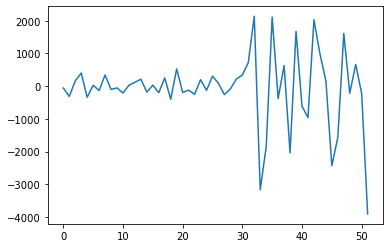

In [39]:
error = diff_test.values - prediction1.values
plt.plot(error)

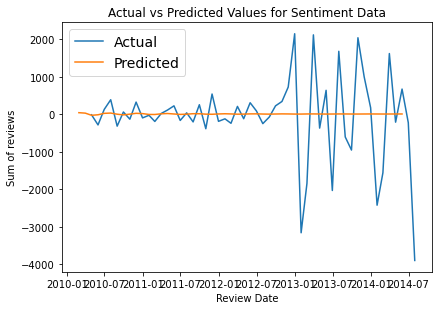

In [40]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(6,4))
plt.plot(diff_test, label='Actual')  
plt.plot(prediction1, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
#plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=12)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

# Building ARIMA Model

In [41]:
# Splitting the data into train and test

ss = int(0.7 * len(reviews))

train1 = reviews.iloc[:ss]
test1 = reviews.iloc[ss:]

print('Train : ',len(train1), '\t Test : ',len(test1))

Train :  123 	 Test :  54


In [42]:
print("ARIMA(1,0,2)): \t LL = ", results2_1.llf, "\t AIC = ", results2_1.aic)
print("ARIMA(2,0,2):  \t LL = ", results2_2.llf, "\t AIC = ", results2_2.aic)
print("ARIMA(3,0,1):  \t LL = ", results2_3.llf, "\t AIC = ", results2_3.aic)
print("ARIMA(4,0,2):  \t LL = ", results2_4.llf, "\t AIC = ", results2_4.aic)
print("ARIMA(5,0,2):  \t LL = ", results2_5.llf, "\t AIC = ", results2_5.aic)

ARIMA(1,0,2)): 	 LL =  -673.758755919083 	 AIC =  1357.517511838166
ARIMA(2,0,2):  	 LL =  -673.4087493938869 	 AIC =  1358.8174987877737
ARIMA(3,0,1):  	 LL =  -673.340218343925 	 AIC =  1358.68043668785
ARIMA(4,0,2):  	 LL =  -670.58516890223 	 AIC =  1357.17033780446
ARIMA(5,0,2):  	 LL =  -670.1662327204918 	 AIC =  1358.3324654409837


In [43]:
p=5; q=2; d=1
m2 = ARIMA(reviews, order=(p,d,q)).fit()
m2.summary()   

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sentiment   No. Observations:                  177
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -1328.969
Date:                Tue, 07 Jun 2022   AIC                           2673.938
Time:                        12:11:23   BIC                           2699.302
Sample:                    11-30-1999   HQIC                          2684.226
                         - 07-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9144      0.064    -14.386      0.000      -1.039      -0.790
ar.L2         -0.6151      0.092     -6.650      0.000      -0.796      -0.434
ar.L3         -0.1016      0.111     -0.911      0.362      -0.320       0.117
ar.L4         -0.2516      0.087     -2.886      0.004      -0.422      -0.081
ar.L5          0.2126      0.063      3.393      0.001       0.090       0.335
ma.L1          1.3740      0.055     25.142      0.000       1.267       1.481
ma.L2          0.9599      0.039     24.921      0.000       0.884       1.035
sigma2      2.451e+05   2.28e+04     10.735      0.000       2e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4553.62
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):             891.87   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
# Predicting the test data

strt = len(train1)
end = len(train1) + len(test1) - 1

print('Start : ',strt,'End : ',end)

prediction2 = m2.predict(strt, end, typ='levels')
prediction2

Start :  123 End :  176


ReviewDate
2010-02-28      792.407334
2010-03-31      843.438701
2010-04-30     1362.784766
2010-05-31      872.704172
2010-06-30      791.065732
2010-07-31     1004.423706
2010-08-31     1033.092113
2010-09-30     1147.427200
2010-10-31     1063.701091
2010-11-30      955.994968
2010-12-31     1611.583392
2011-01-31     1205.124283
2011-02-28     1646.967698
2011-03-31     1458.035630
2011-04-30     1293.945185
2011-05-31     1687.213437
2011-06-30     1809.912765
2011-07-31     1785.061475
2011-08-31     2221.394381
2011-09-30     1846.949561
2011-10-31     2384.856939
2011-11-30     1972.749857
2011-12-31     2507.434081
2012-01-31     2720.413776
2012-02-29     2549.964790
2012-03-31     2301.986669
2012-04-30     2831.346315
2012-05-31     2152.234831
2012-06-30     2815.907771
2012-07-31     3137.452857
2012-08-31     2715.823965
2012-09-30     3124.630625
2012-10-31     3368.790649
2012-11-30     3801.201248
2012-12-31     5614.750689
2013-01-31     9558.618427
2013-02-28     77

In [45]:
reviews_2 = pd.DataFrame({'Actual':test, 'Predicted':prediction2})
reviews_2['Error'] = reviews_2['Actual'] - reviews_2['Predicted']
reviews_2

,Actual,Predicted,Error
ReviewDate,,,
2010-02-28,958,792.407334,165.592666
2010-03-31,1037,843.438701,193.561299
2010-04-30,1102,1362.784766,-260.784766
2010-05-31,884,872.704172,11.295828
2010-06-30,797,791.065732,5.934268
2010-07-31,1098,1004.423706,93.576294
2010-08-31,1083,1033.092113,49.907887
2010-09-30,1129,1147.427200,-18.427200
2010-10-31,1044,1063.701091,-19.701091


In [46]:
p=4; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(test1, prediction2)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 4 , 2 )

MSE :  625426.9684203858

RMSE :  790.8394074781465


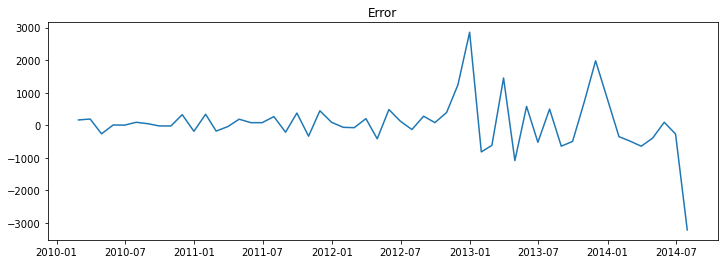

In [47]:
# plotting the errors

plt.subplots(figsize=(12,4))
plt.plot(reviews_2.Error)
plt.title('Error')
plt.show()

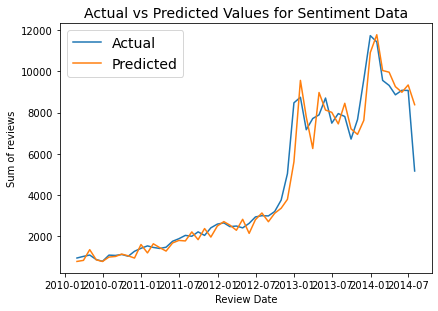

In [48]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(6,4))
plt.plot(reviews_2.Actual, label='Actual')  
plt.plot(reviews_2.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
#plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=14)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

In [49]:
fcast = m2.predict(start=len(reviews), end=len(reviews)+11, typ='levels')
print(fcast)

2014-08-31    4116.874762
2014-09-30    4247.975292
2014-10-31    5220.707361
2014-11-30    5338.041272
2014-12-31    4054.871093
2015-01-31    4800.183911
2015-02-28    4679.101361
2015-03-31    4639.038415
2015-04-30    5022.180520
2015-05-31    4248.496099
2015-06-30    4913.287361
2015-07-31    4726.655944
Freq: M, Name: predicted_mean, dtype: float64


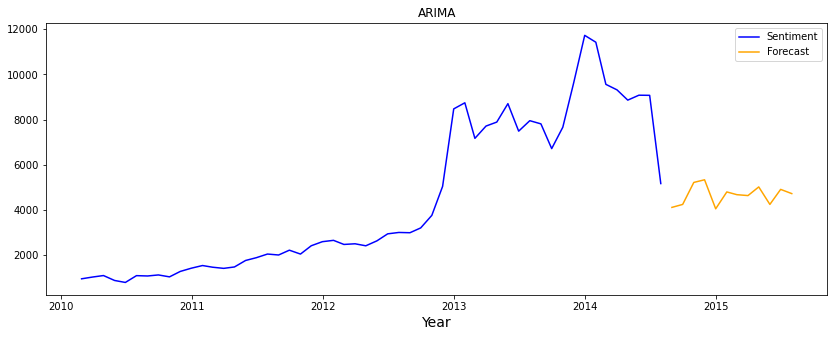

In [50]:
# Forcasting the future values 

plt.subplots(figsize=(14,5))
plt.plot(test1, color='blue', label='Sentiment')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.title('ARIMA')
plt.show()

# Building Sarima model

In [51]:
p=5; q=2; d=1

m3 = sm.tsa.statespace.SARIMAX(train1, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m3.summary()

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sentiment   No. Observations:                  123
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -603.267
Date:                            Tue, 07 Jun 2022   AIC                           1236.534
Time:                                    12:11:36   BIC                           1277.041
Sample:                                11-30-1999   HQIC                          1252.964
                                     - 01-31-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1643      0.163     -7.129      0.000      -1.484      -0.844
ar.L2         -1.4874      0.221     -6.731      0.000      -1.920      -1.054
ar.L3         -0.6408      0.232     -2.759      0.006      -1.096      -0.186
ar.L4         -0.2299      0.166     -1.388      0.165      -0.555       0.095
ar.L5         -0.0646      0.167     -0.386      0.700      -0.393       0.264
ma.L1          0.6245      0.113      5.536      0.000       0.403       0.846
ma.L2          0.9662      0.177      5.471      0.000       0.620       1.312
ar.S.L12      -0.9436      7.445     -0.127      0.899     -15.536      13.649
ar.S.L24      -0.3573      8.103     -0.044      0.965     -16.239      15.525
ar.S.L36      -0.1963      6.812     -0.029      0.977     -13.547      13.154
ar.S.L48      -0.1161      2.081     -0.056      0.956      -4.195       3.962
ar.S.L60      -0.0601      1.218     -0.049      0.961      -2.447       2.326
ma.S.L12       0.1819      7.458      0.024      0.981     -14.436      14.800
ma.S.L24      -0.0502     10.354     -0.005      0.996     -20.343      20.242
sigma2      3177.4016    460.607      6.898      0.000    2274.628    4080.175
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               189.75
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):              13.75   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# Predicting the test data                                

strt = len(train1)
end = len(train1) + len(test1) - 1

print('Start : ',strt,'End : ',end)

prediction3 = m3.predict(strt, end, typ='levels')             # another wat to do -> prediction5 = m5.predict(33, 48)                        
prediction3

Start :  123 End :  176


2010-02-28     860.749890
2010-03-31     943.813603
2010-04-30     890.699626
2010-05-31     894.061139
2010-06-30     931.537705
2010-07-31     944.604784
2010-08-31     916.056912
2010-09-30     916.697014
2010-10-31     969.192833
2010-11-30     987.486201
2010-12-31    1086.232136
2011-01-31    1213.719467
2011-02-28    1017.515153
2011-03-31    1111.379631
2011-04-30    1063.491256
2011-05-31    1090.739364
2011-06-30    1051.684623
2011-07-31    1089.872007
2011-08-31    1097.725763
2011-09-30    1132.620936
2011-10-31    1164.149419
2011-11-30    1254.854646
2011-12-31    1347.996901
2012-01-31    1392.554999
2012-02-29    1312.607023
2012-03-31    1355.724675
2012-04-30    1285.171169
2012-05-31    1353.269410
2012-06-30    1337.173048
2012-07-31    1326.277487
2012-08-31    1357.480411
2012-09-30    1362.762970
2012-10-31    1366.359947
2012-11-30    1442.952109
2012-12-31    1558.412443
2013-01-31    1617.090063
2013-02-28    1471.022991
2013-03-31    1579.189552
2013-04-30  

In [53]:
# Calculating actual, predicted, and error values together

actual=[]; pred=[]

for i in range(len(prediction3)):
    actual.append(test1[i])
    pred.append(prediction3[i])

reviews_3 = pd.DataFrame({'Actual':actual, 'Predicted':prediction3})
reviews_3['Error'] = reviews_3['Actual'] - reviews_3['Predicted']
reviews_3

,Actual,Predicted,Error
2010-02-28,958,860.749890,97.250110
2010-03-31,1037,943.813603,93.186397
2010-04-30,1102,890.699626,211.300374
2010-05-31,884,894.061139,-10.061139
2010-06-30,797,931.537705,-134.537705
2010-07-31,1098,944.604784,153.395216
2010-08-31,1083,916.056912,166.943088
2010-09-30,1129,916.697014,212.302986
2010-10-31,1044,969.192833,74.807167
2010-11-30,1284,987.486201,296.513799


In [54]:
p=5; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(test1, prediction3)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 5 , 2 )

MSE :  19050242.560253732

RMSE :  4364.658355502035


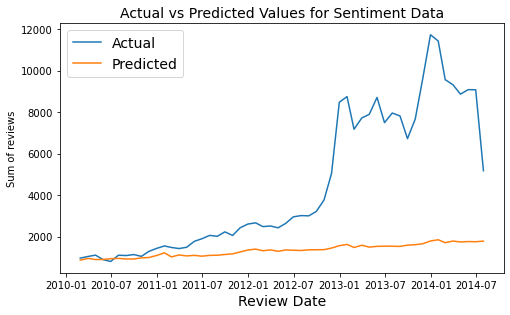

In [55]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(7,4))
plt.plot(reviews_3.Actual, label='Actual')  
plt.plot(reviews_3.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=14)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

In [56]:
fcast = m3.predict(start=len(reviews), end=len(reviews)+11, typ='levels')
print(fcast)

2014-08-31    1771.313197
2014-09-30    1776.525503
2014-10-31    1821.197607
2014-11-30    1882.832876
2014-12-31    1973.718726
2015-01-31    2062.683236
2015-02-28    1923.423840
2015-03-31    1992.223667
2015-04-30    1928.041422
2015-05-31    1982.675933
2015-06-30    1954.719917
2015-07-31    1961.168901
Freq: M, Name: predicted_mean, dtype: float64


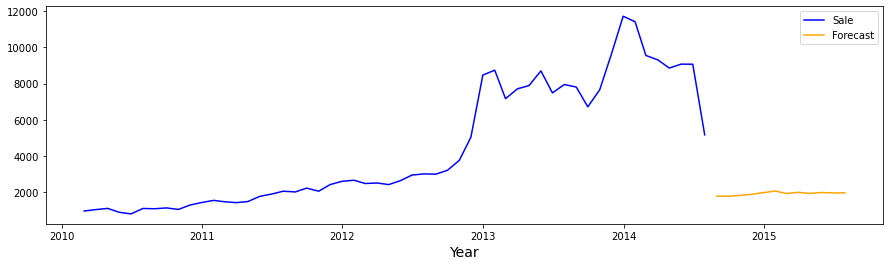

In [57]:
# Forcasting the future values 

plt.subplots(figsize=(15,4))
plt.plot(test1, color='blue', label='Sale')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()